## **Deep AutoVIML** - Image Task
Reference:
* https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Image_Classification_Demo.ipynb

In [3]:
# ! pip install deep_autoviml

In [7]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

from PIL import Image
import matplotlib.pyplot as plt

## Load Dataset
Using Kaggle [Covid-19 Image Dataset](https://www.kaggle.com/pranavraikokte/covid19-image-dataset) provided by user Pranav Raikote

**Image Data Classification**: To classify chest X-rays image into Viral Pneumonia, Normal, or Covid

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d pranavraikokte/covid19-image-dataset
! unzip covid19-image-dataset

 99% 156M/158M [00:01<00:00, 130MB/s]
100% 158M/158M [00:01<00:00, 117MB/s]


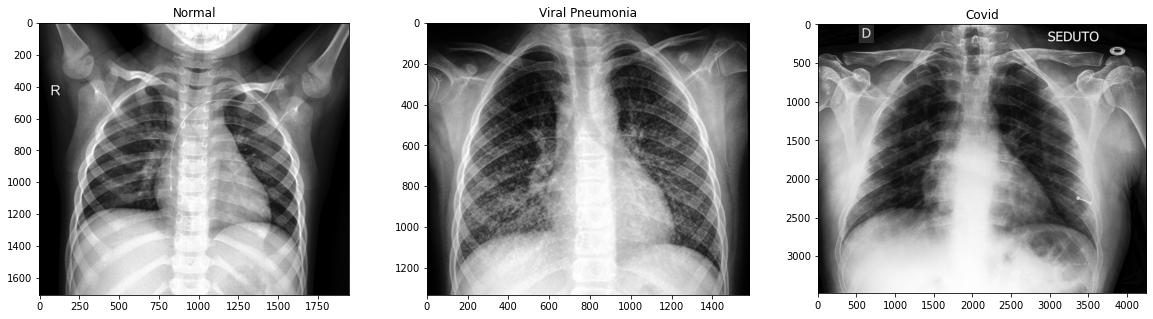

In [9]:
f, axarr = plt.subplots(1,3, figsize=(20,5)) 
sample = '/01.jpeg'
trainpath = '/content/Covid19-dataset/train'
axarr[0].imshow(Image.open(trainpath+'/Normal'+sample))
axarr[0].set(title = "Normal")
axarr[1].imshow(Image.open(trainpath+'/Viral Pneumonia'+sample))
axarr[1].set(title = "Viral Pneumonia")
axarr[2].imshow(Image.open(trainpath+'/Covid'+sample))
axarr[2].set(title = "Covid")
plt.show()

# Deep AutoVIML

### Model Config

In [14]:
image_dir = '/content/Covid19-dataset/'
img_height = 224
img_width = 224
img_channels = 3

In [33]:
keras_model_type =  "image" 
project_name = "covid19_xray"
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 5} 
model_options = {'tuner':"optuna", "max_trials":2, 'cat_feat_cross_flag':True, 
                 'image_directory': image_dir, 'image_height': img_height, 
                 'image_width':img_width, 'image_channels':img_channels }

### Model Training

    Only CPU found on this device
Setting CPU strategy using 1 devices
    Image directory given as /content/Covid19-dataset/
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory /content/Covid19-dataset/. Returning...
Found 251 files belonging to 3 classes.

Splitting train into two: train and validation data
Number of image classes = 3 and they are: ['Covid', 'Normal', 'Viral Pneumonia']
Training image model. This will take time...
Epoch 1/5
2/2 [==============================] - 16s 7s/step - loss: 1.3443 - accuracy: 0.3902 - val_loss: 0.9443 - val_accuracy: 0.5469
Epoch 2/5
2/2 [==============================] - 4s 3s/step - loss: 1.0968 - accuracy: 0.4146 - val_loss: 0.8565 - val_accuracy: 0.5312
Epoch 3/5
2/2 [==============================] - 4s 3s/step - loss: 0.9613 - accuracy: 0.5285 - val_loss: 0.7252 - val_accuracy: 0.7188
Epoch 4/5
2/2 [===========================

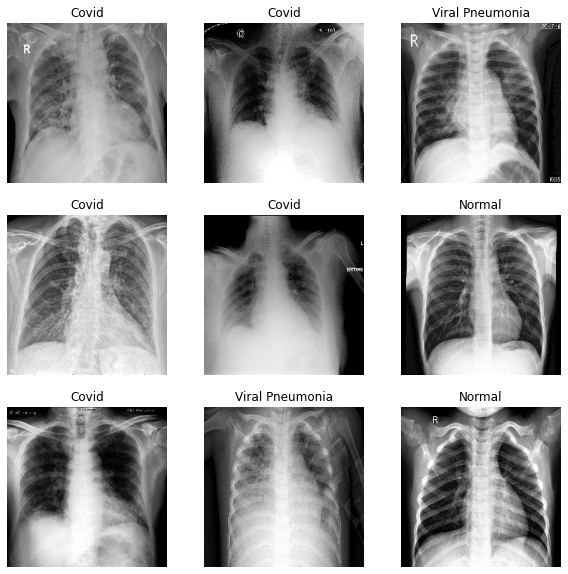

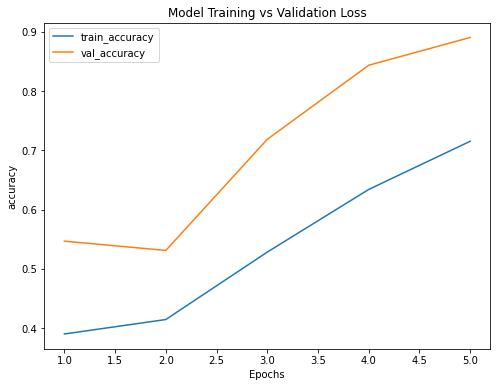

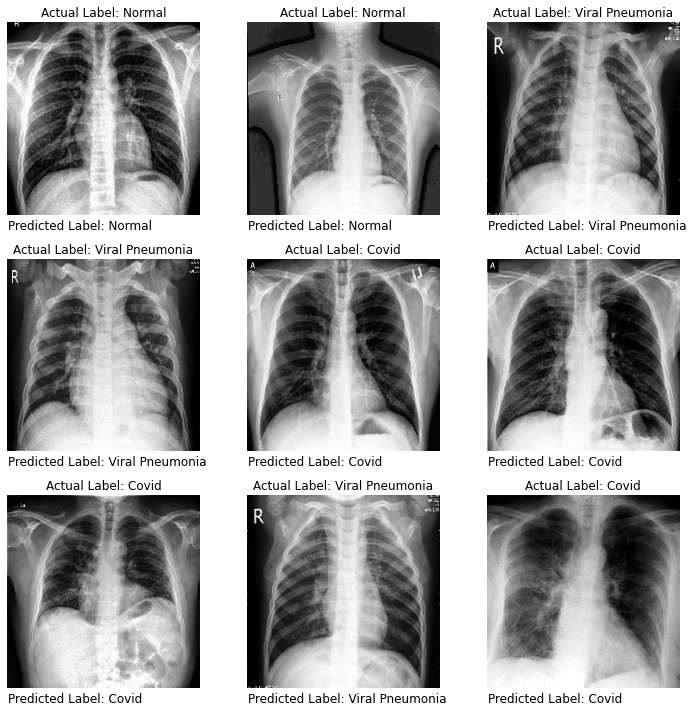

In [34]:
model, cat_vocab_dict = deepauto.fit("", "", keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options, model_options=model_options, 
		save_model_flag=False, use_my_model='', verbose=0)

## Prediction

In [35]:
test_image_dir = image_dir + '/test'
predictions = deepauto.predict_images(test_image_dir, model, cat_vocab_dict, keras_model_type)


Loading deep_autoviml model from <keras.engine.sequential.Sequential object at 0x7ff186037cd0> folder. This will take time...

Using <keras.engine.sequential.Sequential object at 0x7ff186037cd0> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: /content/Covid19-dataset//test
Found 66 files belonging to 3 classes.
    Sample predictions before inverse_transform: [2 2 2 2 0]
    Sample predictions after inverse_transform: ['Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Covid']


In [36]:
predictions[0][:5]

array([[0.033, 0.188, 0.779],
       [0.087, 0.116, 0.797],
       [0.084, 0.35 , 0.566],
       [0.065, 0.129, 0.805],
       [0.399, 0.219, 0.382]], dtype=float32)

In [37]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(testpath,
  seed=111,
  image_size=(img_height, img_width),
  batch_size=128)

Found 66 files belonging to 3 classes.


In [38]:
model.evaluate(test_ds)

1/1 [==============================] - 2s 2s/step - loss: 0.6541 - accuracy: 0.7121


[0.6540868282318115, 0.7121211886405945]